In [15]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# NumPy
import numpy as np

# OS
import os

# Import load_dotenv
from dotenv import load_dotenv



In [16]:
# Load dotenv
load_dotenv()

# Create Engine - Accessing the Environment Variables
engine = create_engine(f"postgresql://{os.environ.get('DB_USERNAME')}:{os.environ.get('DB_PASSWORD')}@{os.environ.get('HOST')}/{os.environ.get('DB_NAME')}")
connection = engine.connect()



In [17]:
# Query All Records in the the Salary Table
salary_data = pd.read_sql("SELECT * FROM salaries", connection)

In [18]:
# Preview the Salary Table
salary_data.head(10)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
5,10006,40000,1990-08-05,1991-08-05
6,10007,56724,1989-02-10,1990-02-10
7,10008,46671,1998-03-11,1999-03-11
8,10009,60929,1985-02-18,1986-02-18
9,10010,72488,1996-11-24,1997-11-24


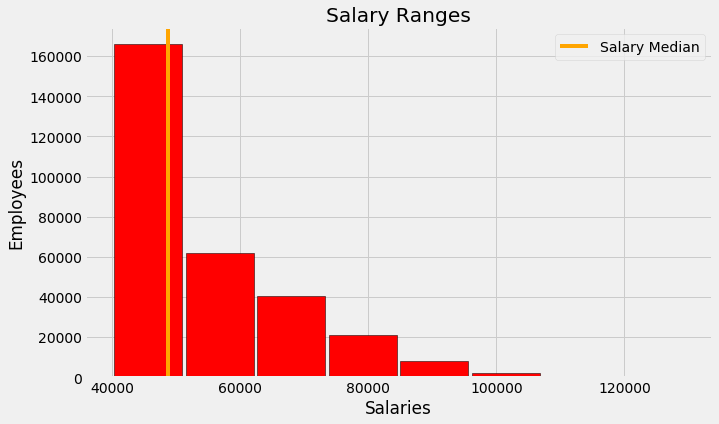

In [19]:
# Set Plot Style
plt.style.use('fivethirtyeight')

# Create a Histogram Plot using "salary" column 
hist_plot = salary_data['salary'].hist(bins=8, rwidth=0.95, edgecolor='black', color='r',figsize=(10,6))

# Set Median Salary
median_salary = salary_data['salary'].median()

# Set a Vertical Line for Median Salary
plt.axvline(median_salary, color='orange',label='Salary Median')

# Set Plot Labels, Title and Legend 
plt.title('Salary Ranges')
plt.xlabel('Salaries')
plt.ylabel('Employees')
plt.legend()

# Save Figure
plt.savefig("salary_ranges.png")

# Show plot
plt.show()

In [20]:
# Query Joined Tables Grouped by title [(title + employee) + salaries]
salary_title_data = pd.read_sql("SELECT titles.title,AVG(salary) AS salary_average FROM titles \
INNER JOIN employees ON employees.emp_no = titles.emp_no \
INNER JOIN salaries ON salaries.emp_no = titles.emp_no GROUP BY title;", connection)

# Preview Joined & Grouped by Title Table
salary_title_data.head(10)

,title,salary_average
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


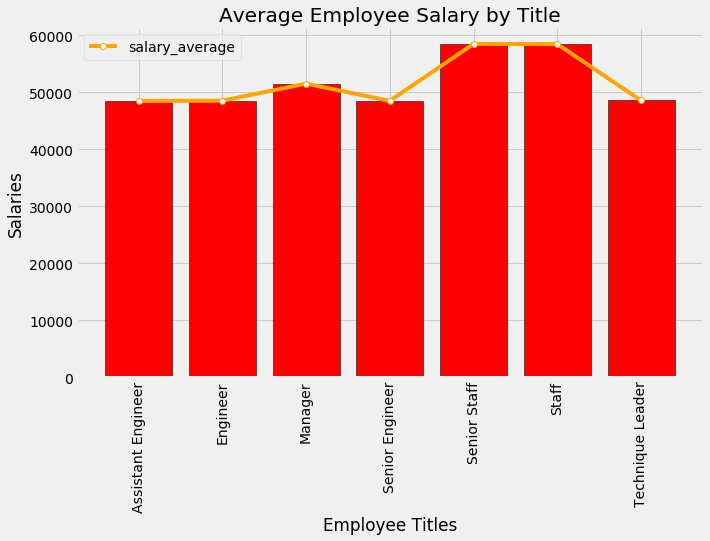

In [21]:
# Set Plot Style
plt.style.use('fivethirtyeight')

# Set Fig Size
fig = plt.figure(figsize=(10,6))

# Set x_axis, y_axis & Tick Locations
x_axis = salary_title_data["title"]
y_axis = salary_title_data["salary_average"]
ticks = np.arange(len(x_axis))

# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", edgecolor='black', color='r')

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="90")

# Set a Trending Line for Average Salary
plt.plot(x_axis, y_axis, '-o', color='orange', mfc='white')

# Set Plot Labels , Title and Legend
plt.ylabel("Salaries")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title")
plt.legend()

# Save Figure
plt.savefig("average_salary_by_title.png")

# Show plot
plt.show()